# **Introduction to Deep Learning**

<img src="https://incubator.ucf.edu/wp-content/uploads/2023/07/artificial-intelligence-new-technology-science-futuristic-abstract-human-brain-ai-technology-cpu-central-processor-unit-chipset-big-data-machine-learning-cyber-mind-domination-generative-ai-scaled-1-1500x1000.jpg" width="600"/>


<a href="https://colab.research.google.com/github/deep-learning-indaba/indaba-pracs-2025/blob/main/ml-foundations-prac-1/Introduction_to_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

© Deep Learning Indaba 2025. Apache License 2.0.

**Authors:** ...

**Reviewers:** ...

**Introduction:**

In this tutorial, we will learn about some of the high-level concepts behind machine learning (ML) and the basics of JAX, a numerical computing library that we will use for our practicals. Finally, we will learn about the fundamentals of supervised learning, from linear regression, all the way to neural networks, learning the fundamentals of optimisation along the way.

**Topics:**

Content: <font color='green'>`Numerical Computing`</font> , <font color='orange'>`Supervised Learning`</font>  
Level: <font color='grey'>`Beginner`</font>


**Aims/Learning Objectives:**

- Learn high-level concepts in ML - data, models and learning.
- Get a high-level overview of modern ML terminology.   
- Learn the basics of JAX and how to use it.
- Learn about linear regression and neural networks, and how to implement them in JAX.

**Prerequisites:**

- Basic knowledge of [NumPy](https://github.com/numpy/numpy).
- Basic knowledge of [functional programming](https://en.wikipedia.org/wiki/Functional_programming).

**Outline:**
>[Introduction to Deep Learning](#scrollTo=7ub_WZ6A88_e)

>>[Installation and Imports](#scrollTo=6EqhIg1odqg0)

>[Part 1 - What is Machine Learning - 25 minutes ⏰](#scrollTo=cMhBHaeYEn9t)

>>[💻Introduction and Motivation](#scrollTo=OueV4gWwEn9u)

>>>[Is it a 1 or a 7?](#scrollTo=OueV4gWwEn9u)

>>>[🎯 Task descripton](#scrollTo=LNZkgtyAiIAu)

>>>[What is Machine Learning?](#scrollTo=DIe8aXmGrWEL)

>>[🔑 Key Components](#scrollTo=pR-gqkkOEn9w)

>>>[1.1 Data](#scrollTo=YcXv8nydNjwL)

>>[1.2 Models](#scrollTo=S586n3hEEn9z)

>>[1.3 Learning](#scrollTo=W0hbEofBQOn8)

>>>>[Loss Function](#scrollTo=W0hbEofBQOn8)

>>>>[Learning Algorithm](#scrollTo=W0hbEofBQOn8)

>>>>[Generalization](#scrollTo=W0hbEofBQOn8)

>>[1.4 Types of machine learning problems](#scrollTo=Y71M5dCdEn9z)

>>[1.5 Modern Terminology](#scrollTo=_ssdwdCLEn9z)

>[Part 2 - Building a Deep Learning Model from scratch - 45 minutes ⏰](#scrollTo=Enx0WUr8tIPf)

>>[2.1 What is a Neural Network?](#scrollTo=B_ZUCGGbpkwV)

>>[2.2 Activation Functions](#scrollTo=_GLH0mPpqTet)

>>[2.3 Forward Propagation](#scrollTo=UvjplT3PqssE)

>>[2.4 Loss functions](#scrollTo=RZcW6glVq-QM)

>>[2.5 Backpropagation](#scrollTo=migTukJerZhO)

>>[2.6 Optimization](#scrollTo=pCTVMR4tvIvS)

>>[2.7 Putting it all together](#scrollTo=Si86A1wbv6dg)

>[Part 3 - Building bigger models using specialied DL framworks - 30 minutes ⏰](#scrollTo=aB0503xgmSFh)

>>[3.1 Brief Introduction to JAX](#scrollTo=DG5ZkS3C4auq)

>>[3.2 Re-Implemeting our Model in JAX](#scrollTo=_pANISs05iHL)

>>[3.3 Automatic differentiation with JAX](#scrollTo=R56u9v1v6Grn)

>>[3.4 Training and Evaluation](#scrollTo=gq_ZRdUa6otr)

>[Conclusion](#scrollTo=fV3YG7QOZD-B)

>[Appendix:](#scrollTo=XrRoSqlxfi7f)

>>[Derivation of partial derivatives for exercise 2.4.](#scrollTo=9OH9H7ndfuyQ)

>[Feedback](#scrollTo=o1ndpYE50BpG)


**Before you start:**

Run the "Installation and Imports" cell.


## Installation and Imports

In [ ]:
## Install and import anything required. Capture hides the output from the cell.
# @title Install and import required packages. (Run Cell)

!pip install --quiet -U pandas jax matplotlib scikit-learn ipywidgets flax

import jax
import jax.numpy as jnp
from jax import grad, jit, vmap, pmap
from typing import NamedTuple, Any, Dict

import matplotlib.pyplot as plt
import numpy as np

# download Mnist and store it at ~/scikit_learn_data for offline use
from sklearn.datasets import fetch_openml
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [ ]:
# @title Helper Functions. (Run Cell)
...

In [ ]:
# @title Check the device you are using (Run Cell)
print(f"Num devices: {jax.device_count()}")
print(f" Devices: {jax.devices()}")

# **Part 1 - What is Machine Learning** - 25 minutes ⏰

## 💻**Introduction and Motivation**

### Is it a 1 or a 7?

Imagine you had to design a system that detects text from people's handwriting. Could you code this up from first principles? This problem is really challenging! Even identifying just numbers is tough since each digit can be written in countless ways.

If you are stuck, do not worry, this is a challenging problem to solve. The key insight is that, while defining rules to recognize handwritten digits is difficult, you already have the ability to do this. You can look at a handwritten number and tell what number it is. With this ability, you can collect a large dataset of handwritten digits and label this dataset with the correct numbers. Using this dataset, you can train a machine learning model to do the task -- the same task that would be really challenging to do using rules.  



**Exercise 1.1** Let's play a digit guessing game to simulate what we discussed above! Can you identify these digits? Do you think this is hard for a computer to do?

In [ ]:
## Hide code.
# @title Helper functions. (Run Cell)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from ipywidgets import widgets, HBox, VBox
from IPython.display import display, HTML
import io

# Function to display an image and get user input
def display_and_guess(x_train, y_train, question, options, interactive=True):
    idx = np.random.randint(0, len(x_train))
    image = x_train[idx]
    label = y_train.iloc[idx]

    # Create the image
    fig, ax = plt.subplots(figsize=(3, 3))
    ax.imshow(image, cmap='gray')
    ax.axis('off')
    ax.set_title(question, fontsize=12)

    if interactive:
        # Convert plot to image
        buf = io.BytesIO()
        fig.savefig(buf, format='png')
        buf.seek(0)
        img = widgets.Image(value=buf.getvalue(), format='png')
        plt.close(fig)

        output = widgets.Output()

        def on_button_click(b):
            with output:
                output.clear_output()
                if b.description == str(label):
                    display(HTML(f'<p style="color:green; font-size:12px;"><b>Correct! 🎉</b></p>'))
                else:
                    display(HTML(f'<p style="color:red; font-size:12px;"><b>Incorrect. It was a \'{label}\'. 😔</b></p>'))

        # Create buttons dynamically based on the provided options
        buttons = [widgets.Button(description=str(option), button_style='info', layout=widgets.Layout(width='40px')) for option in options]
        for button in buttons:
            button.on_click(on_button_click)

        return VBox([img, HBox(buttons), output])

    else:
        plt.show()
        # Non-interactive fallback for VSCode notebooks or other environments
        user_input = input(f"{question} Enter your guess {options}: ")
        if user_input == str(label):
            print("Correct! 🎉")
        else:
            print(f"Incorrect. It was a '{label}'. 😔")

def numbers_recognition_game(rounds=2, interactive=True):

    # Play the game for a few rounds
    display(HTML('<h1 style="text-align:center;">Let\'s play a digit guessing game!</h1>'))

    # Load the MNIST dataset
    print("Loading MNIST dataset...")
    mnist = fetch_openml('mnist_784', version=1, data_home="~/scikit_learn_data")
    X = mnist['data'].values.reshape(-1, 28, 28)
    y = mnist['target'].astype(int)

    # Prepare datasets for '1' vs '7' and '0' vs '6'
    datasets = {
        "1 vs 7": (X[np.where((y == 1) | (y == 7))[0]], y.iloc[np.where((y == 1) | (y == 7))[0]]),
        "0 vs 6": (X[np.where((y == 0) | (y == 6))[0]], y.iloc[np.where((y == 0) | (y == 6))[0]])
    }

    for _ in range(rounds):
        row = []
        for question, (x_train, y_train) in datasets.items():
            options = [int(digit) for digit in question.split(" vs ")]
            row.append(display_and_guess(x_train, y_train, f"Is this a {question}?", options, interactive))

        # Add a third column with a random question
        random_question = np.random.choice(list(datasets.keys()))
        x_train, y_train = datasets[random_question]
        options = [int(digit) for digit in random_question.split(" vs ")]
        row.append(display_and_guess(x_train, y_train, f"Is this a {random_question}?", options, interactive))

        if interactive:
            display(HBox(row))

    display(HTML('<h2 style="text-align:center;">Thanks for playing!</h2>'))

In [ ]:
numbers_recognition_game(rounds=2, interactive=True)

How did you do? You might have gotten easy or hard numbers to distinguish, but think about all the possible handwriting styles out there.

In the next section, we discuss Machine learning (ML), a technique which you could use to teach a computer to play this game.

If no images were displayed, make sure you have `ipywidgets` installed, or run `numbers_recognition_game(rounds=2, interactive=False)`.

### 🎯 Task descripton
TODO: Introduce the dataset we will use for this practical and the goal we want to achieve by the end of the practical, i.e. linear regression task we want to achieve by the end of the tutorial to motivated the going through the prac.

### What is Machine Learning?

Machine learning (ML) is about designing algorithms that automatically extract useful information from data ([mathematics for machine learning](https://mml-book.github.io/)). Instead of explicitly programming every rule, ML allows the computer to learn from data and make predictions or decisions based on what it has learned.

In ML, there are three main components: data, models, and learning.

## 🔑 **Key Components**

- **Data**: These are generally a collection of examples that we want to learn from.
- **Models**: Functions that take data as input and produce predictions or decisions as output. These models are controlled by parameters, which are like adjustable knobs that determine how the model behaves.
- **Learning**: The process of adjusting the model's parameters to improve its performance on a specific task.

### 1.1 **Data**

ML is about finding patterns in data, which can take various forms such as images, text, audio, and more. For computers to process and analyze this data, it must be represented numerically, often as vectors (which are like lists of numbers) or matrices (which are like grids of numbers). For example, an image can be represented as a grid where each cell contains a pixel value, reflecting the brightness or colour at that point, the number 0 can be used for black and 255 for white, and the numbers in between can represent varying brightness from black to white.

**Understanding Inputs and Labels:**

In a machine learning task, our data typically consists of two main components: inputs (also called features) and labels. The input is the information we have and use to make predictions. The label is the outcome we want to predict.

For example, in a digit recognition task:

- The **input** would be an image of a handwritten digit.
- The **label** would be the actual digit that the image represents (e.g., 0, 1, 2, ..., 9).

**Supervised Learning and Datasets:**

In supervised learning, the most common type of machine learning, we work with input-output pairs. Each pair consists of an input and its corresponding label, and each pair is referred to as a sample. Collectively, these samples form a dataset.

We use this dataset to train an ML model. The model learns from the patterns in the input-output pairs and uses this knowledge to make predictions on new, unseen inputs. The goal is to create a model that can accurately predict the output (label) when given a new input, even if it hasn't seen that specific example before.

Let's visualise the data, showing how we could represent it numerically (raw pixel value) and what the actual image looks like.  

In [ ]:
## Hide code.
# @title Let's the Visualise data. (Run Cell)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split

# Load MNIST dataset
print("Loading MNIST dataset...")
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False, data_home="~/scikit_learn_data")

# Convert data to numpy arrays and ensure correct data type
X = np.array(X).astype(float)
y = np.array(y).astype(int)

# Print information about the dataset
print(f"Dataset shape (Num_Examples, Size of Each Example (28*28)): {X.shape}")
print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of unique labels/numbers: {len(np.unique(y))}")

# Display an example image with pixel values
example_index = 0
example_image = X[example_index].reshape(28, 28)
example_label = y[example_index]

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# Display the pixel values
ax1.imshow(example_image, cmap='gray')
ax1.set_title("Raw Pixel Values")
for i in range(28):
    for j in range(28):
        ax1.text(j, i, f'{int(example_image[i, j])}',
                 ha='center', va='center', color='red', fontsize=6)

# Add shape information to axis labels
ax1.set_xlabel("Width: 28 pixels")
ax1.set_ylabel("Height: 28 pixels")


# Display the image
ax2.imshow(example_image, cmap='gray')
ax2.set_title(f"Example Image (Label: {example_label})")
ax2.axis('off')


plt.tight_layout()
plt.show()


**Dataset Splits**

In ML, the dataset is typically split into two parts: the training set and the test set. The training set is used during learning (which we will discuss below), while the test set is used to evaluate how well the model performs on new, unseen data.

The dataset might have 70,000 grayscale images. If we split this dataset into 80% training data and 20% test data, we would have 56,000 images for training and 14,000 images for testing. We will see similar splits in Part 3.

In [ ]:
# Split the data into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("\nDataset split:")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")

Another important data aspect is the quality of the dataset. If the data is noisy, missing values, or biased, it can lead to poor model performance. The saying "garbage in, garbage out" applies here. The size of the dataset is also important. A larger dataset can help the model learn better patterns.

## 1.2 **Models**

Models transform data in useful ways. They take input data and produce the desired output. Formally, a model is a function $f(x)$ that maps input data $x$ (a sample from our dataset) to output data $y$ (the label). For example, in digit recognition, the input is an image of a digit, and the output is the predicted digit.

The model's behaviour is controlled by parameters, which are adjustable values updated during the learning process.

## 1.3 **Learning**

**Learning** is the process of improving a model's performance by updating its parameters. This improvement is guided by an **objective function**, often called the **loss function**, which measures how well the model is performing.

#### Loss Function

The **loss function**, denoted as $ L $, quantifies the difference between the model's prediction $ f(x) $ and the actual outcome $ y $. It outputs a number that represents how close the prediction is to the actual outcome.

- **Prediction**: $ f(x) $
- **Actual Outcome**: $ y $
- **Loss Function**: $ L(f(x), y) $

The goal of learning is to **minimize** this loss function. Although we could also maximize the loss function in theory, minimizing it is the conventional approach.

#### Learning Algorithm

The **learning algorithm** is responsible for adjusting the model's parameters to minimize the loss function. Intuitively, you can think of learning as **tuning** the model's knobs (parameters) to get the desired behaviour. The learning algorithm does the tuning, while the loss function tells us *how well the tuning is working*.

Formally, learning involves finding the parameters $\theta$ of our model $f$ that minimize the loss function $L$ over the dataset $X$:

Minimize $L(f(x; \theta), y)$ over  $X$.

#### Generalization

Our goal is not only to perform well on the training data but also to ensure that the model generalizes well to new, unseen data. This aspect will be discussed in more detail in Part 3.

Learning can occur in various settings. We will explore the main types of learning in the next section.

**Exercise 1.2**: Which of the following best describes the core principle of machine learning?

(*Discuss with your neighbours*).

**a**) Writing complex algorithms to solve specific problems.

**b**) Manually programming rules for every possible scenario.

**c**) Allowing computers to learn from data without being explicitly programmed.

**d**) Developing AI that can mimic human thought processes.

In [ ]:
selection = "a"  # @param ["a", "b", "c", "d"]
print(f"You selected: {selection}")

correct_answer = "c"
if selection != correct_answer:
  print("Incorrect answer, the correct answer is C. ML brings a paradigm shift in how we approach problem-solving with computers. Instead of manually programming every rule, machine learning allows computers to learn patterns and make decisions based on data.")
else:
  print("Nice, you got the correct answer!")

## **1.4 Types of machine learning problems**

Broadly speaking, machine learning tasks can be classified into three categories.

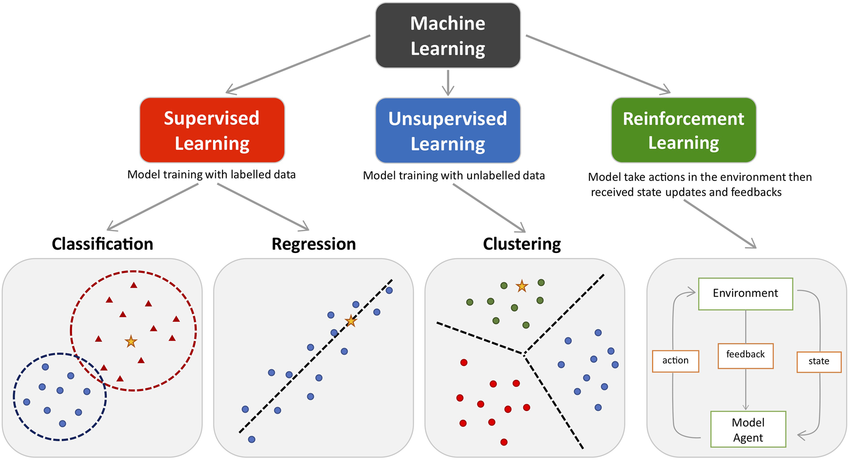

[Image Source](https://www.researchgate.net/publication/354960266/figure/fig1/AS:1075175843983363@1633353305883/The-main-types-of-machine-learning-Main-approaches-include-classification-and.png).

**Supervised Learning:** *In supervised learning, the algorithm is trained on a labelled dataset, where each input data point is paired with the correct output (label).* The goal is to learn a mapping from inputs to outputs based on the training data. Once trained, the model can make accurate predictions on new, unseen data. This approach is commonly used for tasks like classification and regression, where the correct answers are known during training.

**Unsupervised Learning:** *In unsupervised learning, the algorithm works with an unlabeled dataset, meaning the data has no predefined labels or outcomes.* The objective is to discover patterns, structures, or relationships within the data. This might involve grouping similar data points (clustering) or reducing the dimensionality of the data to uncover hidden patterns. Unsupervised learning is often used in exploratory data analysis and for finding natural groupings in data.

**Reinforcement Learning:** *In reinforcement learning, the algorithm learns to make decisions by interacting with an environment.* The learner, known as the *agent*, takes actions and receives feedback in the form of rewards or penalties. The goal is to learn a strategy, or *policy*, that maximizes the cumulative reward over time. Reinforcement learning is commonly applied in areas like robotics, game playing, and autonomous systems, where an agent must learn to navigate complex environments.

**Exercise 1.3**: Can you identify to which of the categories the following task belongs?
  - Teaching a robot how to walk.
  - Weather prediction.
  - Spam email classification.
  - Teach a computer how to play chess.
  - Grouping together different kinds of movie reviews.

In [ ]:
# @title Solution - Exercise (Try not to peek until you've given it a good try!')
print("Teaching a robot how to walk -- Reinforcement learning")
print("Weather prediction -- Supervised learning")
print("Spam email classification -- Supervised learning")
print("Teach a computer how to play chess -- Reinforcement learning")
print("Grouping together different kinds of movie reviews -- Unsupervised learning")

## **1.5 Modern Terminology**

In recent years, several new concepts and terms have emerged in ML. We will briefly discuss some of these modern terminologies that might be relevant to your learning journey:

<details>
  <summary><strong>General Terminology (Click Me)</strong></summary>

  - **Deep learning**: A branch of ML that uses neural networks (think of these as expressive models from 1.2) with many layers to learn complex patterns in data. These networks are especially good at handling large, unstructured data like images, audio, and text. Deep learning has made significant advances in areas like image recognition and language processing. We’ll dive deeper into this topic in Part 3.
  - **Self-supervised learning**: A learning approach where the model learns from the data itself without requiring explicit labels. The model is trained to predict certain parts of the input data based on other parts, effectively creating its own supervision signal. This is different from supervised learning, where the model learns from labelled examples provided by humans, and unsupervised learning, where the model learns patterns from unlabeled data. Self-supervised learning has gained popularity due to its ability to leverage large amounts of unlabeled data for training.
</details>

<details>
  <summary><strong>Generative-modelling Terminology (Click Me)</strong></summary>

  - **Generative vs Discriminative Models**: Generative models create new data similar to existing data (like generating new images) by learning the underlying data distribution. In contrast, discriminative models classify or distinguish between different types of data (like classifying images). Examples of generative models include Generative Adversarial Networks (GANs), Variational Autoencoders (VAEs), and Autoregressive Models, useful for tasks like image and text generation.
  - **Autoregressive Models**: These models generate sequences by predicting the next element based on previous ones. They're commonly used in text generation, music composition, and time series forecasting. **Large Language Models (LLMs)** like GPT-3 use this approach, predicting the next word in a sentence based on the previous words. **Transformers**, a type of neural network used in LLMs, excel at processing sequences in parallel. If you want to learn more, check out the [LLM 2023](https://github.com/deep-learning-indaba/indaba-pracs-2023/blob/main/practicals/large_language_models.ipynb) and [2024 practicals](https://github.com/deep-learning-indaba/indaba-pracs-2024/tree/main).

  - **Diffusion models**: These models generate data by reversing a process of adding noise. For example, they start with a noisy image and learn to remove the noise to produce a clear image. Diffusion models have been successful in generating high-quality images, with examples like Imagen and DALL-E. For more details, explore the [diffusion practical](https://github.com/deep-learning-indaba/indaba-pracs-2024/blob/main/practicals/Diffusion_Models/Diffusion_Models.ipynb).
</details>

# **Part 2 - Building a Deep Learning Model from scratch** - 45 minutes ⏰

TODO Introduction and motivation for Deep Learning




## 2.1 **What is a Neural Network?**
TODO: Describe MLP architeture and its components



## 2.2 **Activation Functions**

## 2.3 **Forward Propagation**
TODO: Implement the forward pass for MLP

## 2.4 **Loss functions**

## 2.5 **Backpropagation**
TODO: Implement backprogation using chain rule

## 2.6 **Optimization**
TODO: Explain how to update the model weights using stochastic gradient descent

## 2.7 **Putting it all together**
TODO: Split the data, train the model, log the loss and evaluate performance

# **Part 3 - Building bigger models using specialied DL framworks** - 30 minutes ⏰

TODO: Disscuss the limitations for manual Numpy implementations and the advantages of use ML frameworks like JAX and Pytorch.

In [ ]:
# @title Helper code to plot a Sine curve
amplitude = 2
x = np.linspace(0, 2*np.pi, 1000)
y = amplitude*np.sin(x) + np.random.randn(1000)*0.1   # Calculate y values using the sine function
yfit = amplitude*np.sin(x)

plt.figure(figsize=(8, 6))
plt.scatter(x, y, label="data", color='red')
plt.plot(x, yfit, label=f'Sine Curve with Amplitude = {amplitude}', color='black')
plt.title('Sine Curve')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
# plt.grid()
plt.show()

## 3.1 **Brief Introduction to JAX**
TODO: Import jax and briefly explain similarities and differences with numpy.

## 3.2 **Re-Implemeting our Model in JAX**

TODO: first reimplment our small model with jax then discuss how to scale it and implement a bigger one

## 3.3 **Automatic differentiation with JAX**
Discuss how to do gradients computations automatically with JAX

## 3.4 **Training and Evaluation**
TODO: train the bigger model with Jax and analyse the performance.

Congratulations, we've just trained a machine learning model for classification using the popular mnist digit dataset.

**Take home challenge**:
- Are you satisfied with the accuracy of your model?
- What can you do to improve the accuracy of the model?

# **Conclusion**
**Summary:**
- Machine learning is the science of using data to build intelligent systems.
- Deep learning is the subset of machine learning methods that uses neural networks.
- Optimisation is the process of finding the parameters that make the loss of a function as small as possible.
- JAX is a new popular framework that can be used to compute derivatives and train machine learning models.  
- JAX combines Autograd and XLA to perform **accelerated** 🚀 numerical computations. These computations are achieved using transforms such as `jit`,`grad`,`vmap` and `pmap`.
- JAX's `grad` function automatically calculates the gradients of your functions for you!
- Gradient descent is an effective algorithm to learn linear models, but also more complicated models, where analytical solutions don't exist.
- We need to be careful not to over-fit or under-fit on our datasets.


**Next Steps:**

- If you are interested in going deeper into Linear Regression, we have a Bayesian Linear Regression section in the [Bayesian Deep Learning Prac](https://github.com/deep-learning-indaba/indaba-pracs-2022/blob/main/practicals/Bayesian_Deep_Learning_Prac.ipynb).
- Join the reinforcement learning practicals to taste a different flavour of machine learning.


**References:**

Part 1:
1. "Introduction and Motivation" from [Mathematics for Machine Learning by
Marc Peter Deisenroth, A. Aldo Faisal, and Cheng Soon Ong (2020).](https://mml-book.github.io/).
2. "Introduction" from [Dive into Deep Learning](https://d2l.ai/).
3. https://www.simplilearn.com/tutorials/artificial-intelligence-tutorial/ai-vs-machine-learning-vs-deep-learning



Part 2:
1. Various JAX [docs](https://jax.readthedocs.io/en/latest/) - specifically [quickstart](https://jax.readthedocs.io/en/latest/notebooks/quickstart.html), [common gotchas](https://jax.readthedocs.io/en/latest/notebooks/Common_Gotchas_in_JAX.html), [jitting](
https://jax.readthedocs.io/en/latest/jax-101/02-jitting.html#), [random numbers](https://jax.readthedocs.io/en/latest/jax-101/05-random-numbers.html) and [pmap](https://jax.readthedocs.io/en/latest/jax-101/06-parallelism.html?highlight=pmap#).
2. Previous Indaba Practicals - [Introduction to ML using JAX](https://github.com/deep-learning-indaba/indaba-pracs-2022/blob/main/practicals/Introduction_to_ML_using_JAX.ipynb) and [Dive into Machine Learning: Learning by Implementing](https://github.com/deep-learning-indaba/indaba-pracs-2023/blob/main/practicals/Intro_ML_English_Prac.ipynb).

Part 3
1. Parts of this section are adapted from [Deepmind's Regression Tutorial](https://github.com/deepmind/educational/blob/master/colabs/summer_schools/intro_to_regression.ipynb).
2. https://d2l.ai/chapter_linear-networks/linear-regression.html
3. https://www.cs.toronto.edu/~rgrosse/courses/csc411_f18/slides/lec06-slides.pdf
4. [Linear Regression Chapter - Mathematics for Machine Learning Book](https://mml-book.github.io/).

For other practicals from the Deep Learning Indaba, please visit [here](https://github.com/deep-learning-indaba/indaba-pracs-2024).

# **Appendix:**



## Derivation of partial derivatives for Exercise 2.4

Derive $\frac{\partial \mathcal{L}}{\partial w}$:
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial w}
&= \frac{ \partial}{\partial w} \left(\frac{1}{2N} \sum_{i=1}^N \left(y_i - (w x_i + b)\right)^2 \right)
&& \text{(Definition of } \mathcal{L} \text{)} \\\\
&= \frac{1}{2N} \sum_{i=1}^N \frac{ \partial }{\partial w} \left(y_i - (w x_i + b)\right)^2
&& \text{(Constant multiple rule)} \\\\
&= \frac{1}{2N} \sum_{i=1}^N 2 \left(y_i - (w x_i + b)\right)(-x_i)
&& \text{(Chain rule)} \\\\
&= \frac{1}{N} \sum_{i=1}^N -x_i \left(y_i - (w x_i + b)\right)
&& \text{(Simplify)} \\\\
&= \frac{1}{N} \sum_{i=1}^N \left((w x_i + b) - y_i\right)x_i
&& \text{(Distribute the minus)} \\\\
&= \frac{1}{N} \sum_{i=1}^N \left(f(x_i) - y_i\right)x_i
&& \text{(Define } f(x_i) = w x_i + b \text{)}
\end{aligned}



Derive $\frac{\partial \mathcal{L}}{\partial b}$:
\begin{aligned}
\frac{\partial \mathcal{L}}{\partial b}
&= \frac{ \partial}{\partial b} \left(\frac{1}{2N} \sum_{i=1}^N \left(y_i - (w x_i + b)\right)^2 \right)
&& \text{(Definition of } \mathcal{L} \text{)} \\\\
&= \frac{1}{2N} \sum_{i=1}^N \frac{ \partial }{\partial b} \left(y_i - (w x_i + b)\right)^2
&& \text{(Constant multiple rule)} \\\\
&= \frac{1}{2N} \sum_{i=1}^N 2 \left(y_i - (w x_i + b)\right)(-1)
&& \text{(Chain rule)} \\\\
&= \frac{1}{N} \sum_{i=1}^N \left((w x_i + b) - y_i\right)
&& \text{(Simplify)} \\\\
&= \frac{1}{N} \sum_{i=1}^N \left(f(x_i) - y_i\right)
&& \text{(Define } f(x_i) = w x_i + b \text{)}
\end{aligned}

# **Feedback**

Please provide feedback that we can use to improve our practicals in the future.

In [ ]:
# @title Generate Feedback Form. (Run Cell)
from IPython.display import HTML

HTML(
    """
<iframe
	src="https://forms.gle/WUpRupqfhFtbLXtN6",
  width="80%"
	height="1200px" >
	Loading...
</iframe>
"""
)

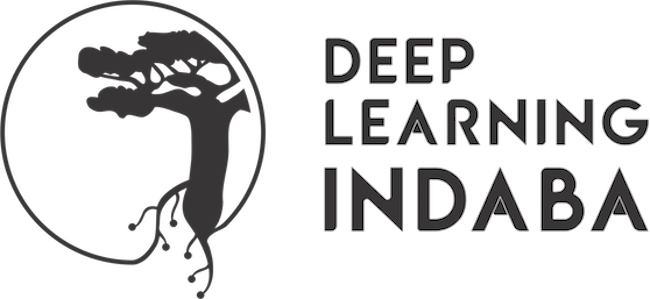